# Read SNOWPACK Output
This script will read in output from SNOWPACK. This involves both .pro and .smet files.

In [10]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

## .pro files

In [66]:
# Function for reading in .pro file
def read_pro(pro):
    
    f = open(pro,'r')
    
    # Header is 47 lines
    for i in range(47):
        header = f.readline()
    
    # After header, read in rest of data
    data = f.readlines()
    
    # Create empty list for data
    data_all = list()
    
    # Read lines in data
    for line in data:
        # Date
        if line[0:4] == '0500':
            d = line.split(',')[1].split('.')
            timestamp = datetime.datetime(int(d[2][0:4]), int(d[1]), int(d[0]), int(d[2][5:7]))
            data_dict = {} # Create dictionary of data for each timestamp
            data_dict['Date'] = timestamp
        # Depth (m)
        elif line[0:4] == '0501':
            depth_dict = list(map(float, line.split('\n')[0].split(',')[2:]))
            depth_dict = np.asarray(depth_dict)/100 # Convert from cm to m
        # Density (kg/m^3)
        elif line[0:4] == '0502':
            density_dict = list(map(float, line.split('\n')[0].split(',')[2:]))
            density_dict = np.asarray(density_dict)
        # Snow temperature (K)
        elif line[0:4] == '0503': 
            temp_dict = list(map(float, line.split('\n')[0].split(',')[2:]))
            temp_dict = np.asarray(temp_dict)
        # Water content (%)
        elif line[0:4] == '0506':
            water_dict = list(map(float, line.split('\n')[0].split(',')[2:]))
            water_dict = np.asarray(water_dict)  
        # Ice content (%)
        elif line[0:4] == '0515':
            ice_dict = list(map(float, line.split('\n')[0].split(',')[2:]))
            ice_dict = np.asarray(ice_dict)
        # Air content (%)
        elif line[0:4] == '0516':
            air_dict = list(map(float, line.split('\n')[0].split(',')[2:]))
            air_dict = np.asarray(air_dict)
        
        # Create firn profiles
            data_dict['Depth'] = depth_dict[i:]
            data_dict['Density'] = density_dict[i:]
            data_dict['Tempearture'] = temp_dict[i:]
            data_dict['Air'] = air_dict[i:]/100
            data_dict['Water'] = water_dict[i:]/100
            data_dict['Ice'] = ice_dict[i:]/100
            data_dict['Density_total'] = density_dict
            data_dict['Depth_total'] = depth_dict
            
            data_all.append(data_dict)
        
    return data_all
    
    f.close()

In [73]:
VIR154 = read_pro('VIR154_TEST.pro')
VIR203 = read_pro('VIR203_TEST.pro')

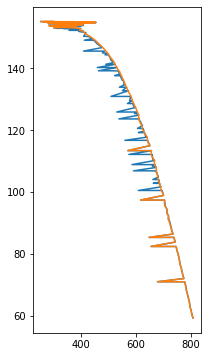

In [79]:
figure = plt.figure(figsize=(3,6))
plt.plot(VIR154[0]['Density'],VIR154[0]['Depth'])
plt.plot(VIR154[-1]['Density'],VIR154[-1]['Depth'])

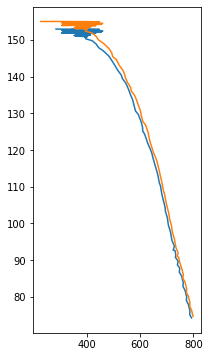

In [80]:
figure = plt.figure(figsize=(3,6))
plt.plot(VIR203[0]['Density'],VIR203[0]['Depth'])
plt.plot(VIR203[-1]['Density'],VIR203[-1]['Depth'])